In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import librosa

[-0.00900574 -0.01152255 -0.01202309 ... -0.02675143 -0.0199047
 -0.00942889]
441000


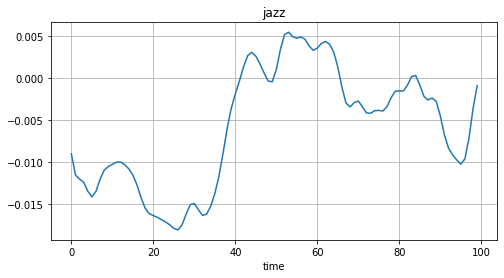

In [2]:
#loading the audio file into timeseriesarray x and samplingrate sr using defalut sr of 22100
audio_data="./data/jazz/jazz.00000_1.wav"
x, sr = librosa.load(audio_data, 44100)
print(x)
print(len(x))
plt.figure(figsize=(8, 4))
plt.plot(x[0:100])
plt.title("jazz")
plt.xlabel("time")
plt.grid()

Average ZCR: 0.049286214098941974
Standard ZCR: 0.01577110705080234


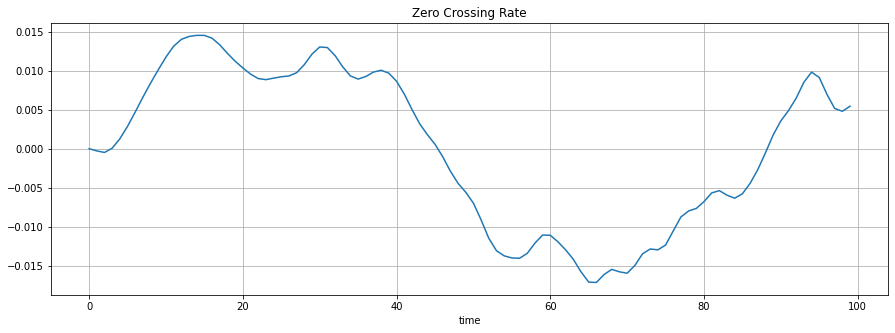

In [3]:
#extracting the zerocrossingrate feature
zcr=librosa.feature.zero_crossing_rate(x,sr)
#print(zcr)
avgzcr = np.mean(zcr)
stdzcr = np.std(zcr)
print("Average ZCR:",avgzcr)
print("Standard ZCR:",stdzcr)
plt.figure(figsize=(15, 5))
plt.plot(x[100:200])
plt.title("Zero Crossing Rate")
plt.xlabel("time")
plt.grid()

Spectral Centroid: 1658.8900283249484


Text(0.5, 0, 'time')

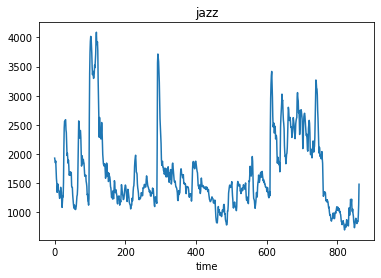

In [4]:
#spectral centroids
spcts = librosa.feature.spectral_centroid(x,sr)[0]
mean_spcts = np.mean(spcts)
#print(spcts)
print("Spectral Centroid:",mean_spcts)
plt.plot(spcts)
plt.title("jazz")
plt.xlabel("time")

Mean Spectral Roll off: 3089.7148822687063
Standard Spectral Roll off: 1425.0681913661033


Text(0.5, 0, 'time')

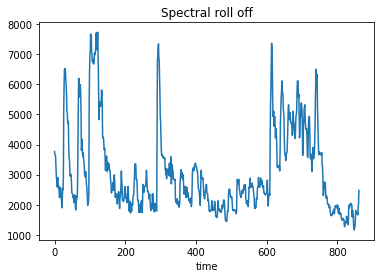

In [5]:
#spectral roll off
sprf = librosa.feature.spectral_rolloff(x,sr)[0]
mean_sprf = np.mean(sprf)
std_sprf = np.std(sprf)
#print(sprf)
print("Mean Spectral Roll off:",mean_sprf)
print("Standard Spectral Roll off:",std_sprf)
plt.plot(sprf)
plt.title("Spectral roll off")
plt.xlabel("time")

[[-3.6500165e+02 -3.6247171e+02 -3.6228104e+02 ... -3.5583881e+02
  -3.4629346e+02 -3.3171838e+02]
 [ 1.4963058e+02  1.4923538e+02  1.4320059e+02 ...  1.8049281e+02
   1.8481186e+02  1.7908849e+02]
 [-6.4762807e+00 -1.1111567e+01 -2.3075623e+01 ... -4.0851274e+00
  -5.3369203e+00 -1.7027935e+01]
 ...
 [-4.0484631e-01  6.6685522e-01  5.8005204e+00 ...  3.2952425e+00
   8.3740864e+00  1.0301134e+01]
 [-1.3409591e-01  5.8220873e+00  1.1043624e+01 ...  8.5955954e+00
   1.4198883e+01  1.4367942e+01]
 [ 2.4892533e+00  4.7848344e+00  4.7699628e+00 ...  4.5676031e+00
   5.8345213e+00  9.2909622e+00]]


Text(0.5, 0, 'MFCC coefficient')

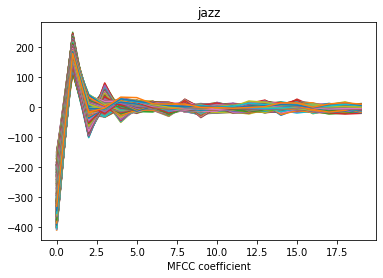

In [6]:
#Mel-Frequency Cepstral Coefficients
mfcc = librosa.feature.mfcc(x,sr)
print(mfcc)
plt.plot(mfcc)
plt.title("jazz")
plt.xlabel("MFCC coefficient")

(862,)


Text(0.5, 0, 'time')

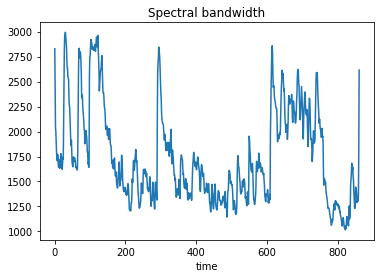

In [7]:
#spectral bandwidth
spbw = librosa.feature.spectral_bandwidth(x,sr)[0]
#print(spbw)
print(spbw.shape)
plt.plot(spbw)
plt.title("Spectral bandwidth")
plt.xlabel("time")

[[0.2976995  0.1974768  0.23441872 ... 0.40773508 0.3795338  0.33360344]
 [0.12030704 0.0627398  0.08559646 ... 0.4250294  0.33894956 0.34483117]
 [0.31792617 0.13786076 0.15947846 ... 0.61373484 0.5212371  0.51729643]
 ...
 [0.4072656  0.25029194 0.21098128 ... 0.6650757  0.46464542 0.6554141 ]
 [0.6220818  0.21737936 0.20553531 ... 0.51668245 0.47133645 0.6303572 ]
 [0.84967273 0.5094473  0.7236507  ... 0.49741125 0.5951529  0.54049325]]
(12, 862)
0.36273062


Text(0.5, 0, 'Chroma coefficients')

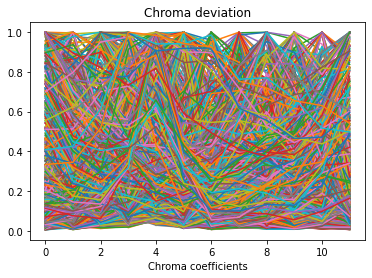

In [8]:
#Chroma deviation
chstft = librosa.feature.chroma_stft(x,sr)
print(chstft)
print(chstft.shape)
print(np.mean(chstft))
plt.plot(chstft)
plt.title("Chroma deviation")
plt.xlabel("Chroma coefficients")

In [9]:
#populating headers
headers = 'filename zcr_mean zcr_std spectral_centroid mean_spectral_rolloff std_spectral_rolloff spectral_bandwidth chroma_deviation_mean '
for index in range(1, 21):
    headers += f' mfcc{index}'
headers += ' genre'
headers = headers.split()
print(headers)

['filename', 'zcr_mean', 'zcr_std', 'spectral_centroid', 'mean_spectral_rolloff', 'std_spectral_rolloff', 'spectral_bandwidth', 'chroma_deviation_mean', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'genre']


In [24]:
#storing headers into csv
import csv
file = open('mycsv_original_27.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(headers)

In [25]:
#storing values into csv
import os
music_genres = 'blues classical country hiphop jazz'.split()
for genre in music_genres:
    for music_file in os.listdir(f'./data/{genre}'):
        audio_data = f'./data/{genre}/{music_file}'
        x, sr = librosa.load(audio_data, mono=True)
        zcr=librosa.feature.zero_crossing_rate(x,sr)
        spcts = librosa.feature.spectral_centroid(x,sr)[0]
        sprf = librosa.feature.spectral_rolloff(x,sr)[0]
        mfcc = librosa.feature.mfcc(y=x, sr=sr)  
        spbw = librosa.feature.spectral_bandwidth(x,sr)[0]
        chstft = librosa.feature.chroma_stft(x,sr)
        feature_data = f'{music_file} {np.mean(zcr)} {np.std(zcr)} {np.mean(spcts)} {np.mean(sprf)} {np.std(sprf)} {np.mean(spbw)} {np.mean(chstft)}'
        for m in mfcc:
            feature_data += f' {np.mean(m)}'
        feature_data += f' {genre}'
        file = open('mycsv_original_27.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(feature_data.split())